<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Analysis Techniques**

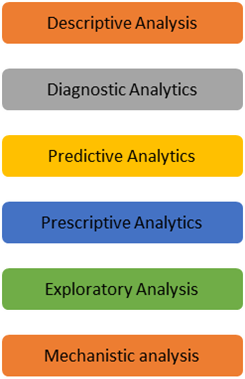

### **Descriptive Analytics**

* What is happening now based on incoming data? 

* It is a method for quantitatively describing the main features of a collection of data. 

* Typically, it is the ﬁrst kind of data analysis performed on a dataset.

* Usually it is applied to large volumes of data, such as census data.

* Description and interpretation processes are different steps.

* Analysts collect quantitative data or translate qualitative data into numbers using large volumes of raw data that needs to be organized and summarized before it can be analyzed. 

### **Dataframes in Data Analysis**

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis. 
# In particular, it offers data structures and operations for manipulating numerical tables and time series. 

import pandas as pd


In [5]:
# Tabulate is an open-source python package/module which is used to print tabular data in nicely formatted tables. 
# It is easy to use and contains a variety of formatting functions.

from tabulate import tabulate


In [ ]:
# A dataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
# You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
# It is generally the most commonly used pandas object.

# Let's create a dataframe from a dictionary and print it

usersDF = pd.DataFrame({
                 'username' :   ['Jack','Jill','Pam','Sam'],
                 'passwd':      [1111, 2222, 3333, 4444],
                 'dept':        ['CSC','MAT','DSS','ART']})

# Display the Dataframe
print(usersDF)


  username  passwd dept
0     Jack    1111  CSC
1     Jill    2222  MAT
2      Pam    3333  DSS
3      Sam    4444  ART


In [ ]:
# Pretty print the dataframe using the fancy_grid format

print(tabulate(usersDF, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════╤══════════╤════════╕
│    │ username   │   passwd │ dept   │
╞════╪════════════╪══════════╪════════╡
│  0 │ Jack       │     1111 │ CSC    │
├────┼────────────┼──────────┼────────┤
│  1 │ Jill       │     2222 │ MAT    │
├────┼────────────┼──────────┼────────┤
│  2 │ Pam        │     3333 │ DSS    │
├────┼────────────┼──────────┼────────┤
│  3 │ Sam        │     4444 │ ART    │
╘════╧════════════╧══════════╧════════╛


# Let's prepare to import a data table from MySQL


In [ ]:
pip install mysql-connector-python

In [ ]:
# Now we can run SQL commands on a remote MySQL database using the connector

import mysql.connector as sql


In [ ]:
# use the same credentials you use to connect to MySQL via Workbench

db_connection = sql.connect(host='208.109.18.154', database='ids1db', user='ids1', password='')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM chickwts')

table_rows = db_cursor.fetchall()

chickDF = pd.DataFrame(table_rows)

print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))


╒════╤═════╤═════╤═══════════╕
│    │   0 │   1 │ 2         │
╞════╪═════╪═════╪═══════════╡
│  0 │   1 │ 179 │ horsebean │
├────┼─────┼─────┼───────────┤
│  1 │   2 │ 160 │ horsebean │
├────┼─────┼─────┼───────────┤
│  2 │   3 │ 136 │ horsebean │
├────┼─────┼─────┼───────────┤
│  3 │   4 │ 227 │ horsebean │
├────┼─────┼─────┼───────────┤
│  4 │   5 │ 217 │ horsebean │
├────┼─────┼─────┼───────────┤
│  5 │   6 │ 168 │ horsebean │
├────┼─────┼─────┼───────────┤
│  6 │   7 │ 108 │ horsebean │
├────┼─────┼─────┼───────────┤
│  7 │   8 │ 124 │ horsebean │
├────┼─────┼─────┼───────────┤
│  8 │   9 │ 143 │ horsebean │
├────┼─────┼─────┼───────────┤
│  9 │  10 │ 140 │ horsebean │
├────┼─────┼─────┼───────────┤
│ 10 │  11 │ 309 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 11 │  12 │ 229 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 12 │  13 │ 181 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 13 │  14 │ 141 │ linseed   │
├────┼─────┼─────┼───────────┤
│ 14 │  15 │ 260 │ linseed   │
├────┼──

In [ ]:
# get some information about the columns in the dataframe
chickDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71 non-null     int64 
 1   1       71 non-null     int64 
 2   2       71 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [ ]:
# display the first 10 rows
chickDF.head(10)


,0,1,2
0,1,179,horsebean
1,2,160,horsebean
2,3,136,horsebean
3,4,227,horsebean
4,5,217,horsebean
5,6,168,horsebean
6,7,108,horsebean
7,8,124,horsebean
8,9,143,horsebean
9,10,140,horsebean


In [ ]:
# Let’s find out what categories exist in column 2 along with their counts by using the value_counts() method

chickDF[2].value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: 2, dtype: int64

In [ ]:
# Let's find the min of the weights column

chickDF[1].min()

108

In [ ]:
# Create a new dataframe and summarize the wieghts column with a few statistical moments

chickSummaryDF = pd.DataFrame({
                 'Min' :   [chickDF[1].min()],
                 'Max':    [chickDF[1].max()],
                 'Mean':   [chickDF[1].mean()],
                 'STD':    [chickDF[1].std()],
                 'Var':    [chickDF[1].var()], 
                 })

# Display the Summary Dataframe
print(tabulate(chickSummaryDF, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════╤═══════╤════════╤═════════╤════════╕
│    │   Min │   Max │   Mean │     STD │    Var │
╞════╪═══════╪═══════╪════════╪═════════╪════════╡
│  0 │   108 │   423 │ 261.31 │ 78.0737 │ 6095.5 │
╘════╧═══════╧═══════╧════════╧═════════╧════════╛


In [ ]:
#  The 25%, 50%, and 75% rows show the corresponding percentiles which indicates the value below which a given percentage 
# of observations in a group of observations fall

# Use two deciaml places for printing
pd.set_option("display.precision", 2)


chickDF.describe()


,0,1
count,71.00,71.00
mean,36.00,261.31
std,20.64,78.07
min,1.00,108.00
25%,18.50,204.50
50%,36.00,258.00
75%,53.50,323.50
max,71.00,423.00


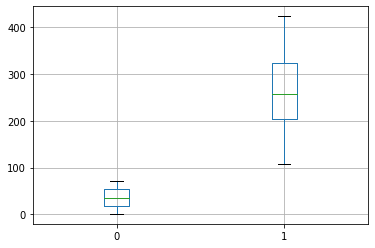

In [ ]:
# A box plot is a method for graphically depicting groups of numerical data through their quartiles. 
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
# The whiskers extend from the edges of box to show the range of the data. 
# The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. 
# Outlier points are those past the end of the whiskers.


chickDF.boxplot()


In [ ]:
# Let's name our dataframe columns

chickDF.columns = ['Item', 'Weight', 'Feed']

print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))


╒════╤════════╤══════════╤═══════════╕
│    │   Item │   Weight │ Feed      │
╞════╪════════╪══════════╪═══════════╡
│  0 │      1 │      179 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  1 │      2 │      160 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  2 │      3 │      136 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  3 │      4 │      227 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  4 │      5 │      217 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  5 │      6 │      168 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  6 │      7 │      108 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  7 │      8 │      124 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  8 │      9 │      143 │ horsebean │
├────┼────────┼──────────┼───────────┤
│  9 │     10 │      140 │ horsebean │
├────┼────────┼──────────┼───────────┤
│ 10 │     11 │      309 │ linseed   │
├────┼────────┼──────────┼───────────┤
│ 11 │     12 │      229 

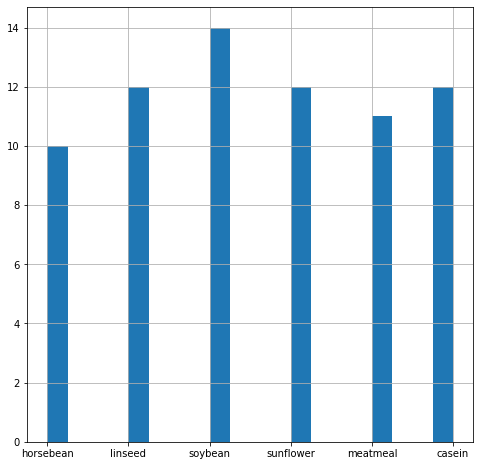

In [ ]:
# Attributes that are tail-heavy make it hard for some ML algorithms to perform well.
# We can transform these attributes (e.g. log normal) to have more bell-shaped distributions.


import matplotlib.pyplot as plt

chickDF['Feed'].hist(bins=20, figsize=(8,8))
plt.show()


In [ ]:
# Let's drop the Item column since we won't need it

del chickDF['Item']


In [ ]:
print(tabulate(chickDF, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═══════════╕
│    │   Weight │ Feed      │
╞════╪══════════╪═══════════╡
│  0 │      179 │ horsebean │
├────┼──────────┼───────────┤
│  1 │      160 │ horsebean │
├────┼──────────┼───────────┤
│  2 │      136 │ horsebean │
├────┼──────────┼───────────┤
│  3 │      227 │ horsebean │
├────┼──────────┼───────────┤
│  4 │      217 │ horsebean │
├────┼──────────┼───────────┤
│  5 │      168 │ horsebean │
├────┼──────────┼───────────┤
│  6 │      108 │ horsebean │
├────┼──────────┼───────────┤
│  7 │      124 │ horsebean │
├────┼──────────┼───────────┤
│  8 │      143 │ horsebean │
├────┼──────────┼───────────┤
│  9 │      140 │ horsebean │
├────┼──────────┼───────────┤
│ 10 │      309 │ linseed   │
├────┼──────────┼───────────┤
│ 11 │      229 │ linseed   │
├────┼──────────┼───────────┤
│ 12 │      181 │ linseed   │
├────┼──────────┼───────────┤
│ 13 │      141 │ linseed   │
├────┼──────────┼───────────┤
│ 14 │      260 │ linseed   │
├────┼──────────┼───────────┤
│ 15 │    

In [ ]:
# Sort the Feed groups based on count or size

chickDF.groupby(['Feed']).size().sort_values(ascending=False)


Feed
soybean      14
casein       12
linseed      12
sunflower    12
meatmeal     11
horsebean    10
dtype: int64

In [ ]:
# Compute the average for each Feed group

chickDF.groupby(['Feed']).mean()


,Weight
Feed,
casein,323.58
horsebean,160.20
linseed,218.75
meatmeal,276.91
soybean,246.43
sunflower,328.92


### **Example**: **Census data is a way to describe a population**

In [ ]:
pip install censusdata

In [ ]:
import censusdata

In [ ]:
# DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
# You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
# It is generally the most commonly used pandas object.

censusDF = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '36'), ('county', '*')]),
           ['B08301_001E', 'B08301_010E'])

* **acs5** refers to the 5 Year American Community Survey and designates the database we are downloading from.
* 2015 is the year that we are getting data from
* censusdata.censusgeo([(**‘state’**, ‘36’), (**‘county’**, ‘*’)]) defines the geography we are interested in. 
* The ‘36’ value is the FIPS (Federal Information Processing Standards) code for New York state while the ‘*’ means we want every county. 
* To look up your own state or county FIPS code refer to the Wikipedia page.
* [‘B08301_001E’, ‘B08301_010E’]  is a list referring to the specific two tables that we are interested in. 

In [ ]:
# Let's examine the contents of the census datafarme in various formats

print(tabulate(censusDF, headers='keys', tablefmt='psql'))



+-------------------------------------------------------------------------+------------------+---------------+
|                                                                         |      B08301_001E |   B08301_010E |
|-------------------------------------------------------------------------+------------------+---------------|
| Schoharie County, New York: Summary level: 050, state:36> county:095    |  13742           |           200 |
| Fulton County, New York: Summary level: 050, state:36> county:035       |  23546           |           141 |
| Rensselaer County, New York: Summary level: 050, state:36> county:083   |  78398           |          1757 |
| Franklin County, New York: Summary level: 050, state:36> county:033     |  19534           |           136 |
| Queens County, New York: Summary level: 050, state:36> county:081       |      1.07675e+06 |        562857 |
| Washington County, New York: Summary level: 050, state:36> county:115   |  27979           |           240 |
|

In [ ]:
# Pretty print the census dataframe in grid format

print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════════════════════════════════════════════════════════╤══════════════════╤═══════════════╕
│                                                                         │      B08301_001E │   B08301_010E │
╞═════════════════════════════════════════════════════════════════════════╪══════════════════╪═══════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │  13742           │           200 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │  23546           │           141 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│ Rensselaer County, New York: Summary level: 050, state:36> county:083   │  78398           │          1757 │
├─────────────────────────────────────────────────────────────────────────┼──────────────────┼───────────────┤
│

In [ ]:
# The data still looks cumbersome to read and interpret.
# Let's first change the cryptic column names so they reflect theor contents

# Note that the first column is the index
censusDF.columns = ['Total_Transportation', 'Total_Public_Transportation']


print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))



╒═════════════════════════════════════════════════════════════════════════╤════════════════════════╤═══════════════════════════════╕
│                                                                         │   Total_Transportation │   Total_Public_Transportation │
╞═════════════════════════════════════════════════════════════════════════╪════════════════════════╪═══════════════════════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │        13742           │                           200 │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │        23546           │                           141 │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┤
│ Rensselaer County, New York: Summary level: 050, state:36> county:0

In [ ]:
# Let's add a new column that expresses the ratio of public transit
# Note that axis=0 means 'row' and axis=1 means 'column'

censusDF['Percent_Public_Transit'] = censusDF.apply(
    lambda row: row['Total_Public_Transportation']/row['Total_Transportation'],  
    axis = 1)    

print(tabulate(censusDF, headers='keys', tablefmt='fancy_grid'))




╒═════════════════════════════════════════════════════════════════════════╤════════════════════════╤═══════════════════════════════╤══════════════════════════╕
│                                                                         │   Total_Transportation │   Total_Public_Transportation │   Percent_Public_Transit │
╞═════════════════════════════════════════════════════════════════════════╪════════════════════════╪═══════════════════════════════╪══════════════════════════╡
│ Schoharie County, New York: Summary level: 050, state:36> county:095    │        13742           │                           200 │               0.0145539  │
├─────────────────────────────────────────────────────────────────────────┼────────────────────────┼───────────────────────────────┼──────────────────────────┤
│ Fulton County, New York: Summary level: 050, state:36> county:035       │        23546           │                           141 │               0.00598828 │
├───────────────────────────────────────

In [ ]:
# Let's take a closer look at the index entries

censusDF.index.tolist()


[censusgeo((('state', '36'), ('county', '095')), 'Schoharie County, New York'),
 censusgeo((('state', '36'), ('county', '035')), 'Fulton County, New York'),
 censusgeo((('state', '36'), ('county', '083')), 'Rensselaer County, New York'),
 censusgeo((('state', '36'), ('county', '033')), 'Franklin County, New York'),
 censusgeo((('state', '36'), ('county', '081')), 'Queens County, New York'),
 censusgeo((('state', '36'), ('county', '115')), 'Washington County, New York'),
 censusgeo((('state', '36'), ('county', '061')), 'New York County, New York'),
 censusgeo((('state', '36'), ('county', '011')), 'Cayuga County, New York'),
 censusgeo((('state', '36'), ('county', '087')), 'Rockland County, New York'),
 censusgeo((('state', '36'), ('county', '063')), 'Niagara County, New York'),
 censusgeo((('state', '36'), ('county', '031')), 'Essex County, New York'),
 censusgeo((('state', '36'), ('county', '059')), 'Nassau County, New York'),
 censusgeo((('state', '36'), ('county', '045')), 'Jefferson

In [ ]:
# The indices are messy so let's clean them up by extracting the county name
# from geospatial data


new_indices = []
county_names = []

for index in censusDF.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)

censusDF.index = new_indices
censusDF['County_Name'] = county_names




In [ ]:
# Let's take another look at the sorted dataframe (by County_Name)
# Federal Information Processing System (FIPS) codes are numbers which uniquely identify geographic areas. 
# The number of digits in FIPS codes vary depending on the level of geography. 
# State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first 
# two are the FIPS code of the state to which the county belongs.

print(tabulate(censusDF.sort_values(by=['County_Name']), headers='keys', tablefmt='fancy_grid'))



╒═══════╤════════════════════════╤═══════════════════════════════╤══════════════════════════╤═════════════════════╕
│       │   Total_Transportation │   Total_Public_Transportation │   Percent_Public_Transit │ County_Name         │
╞═══════╪════════════════════════╪═══════════════════════════════╪══════════════════════════╪═════════════════════╡
│ 36001 │                 152554 │                          8735 │               0.0572584  │ Albany County       │
├───────┼────────────────────────┼───────────────────────────────┼──────────────────────────┼─────────────────────┤
│ 36003 │                  19804 │                           122 │               0.00616037 │ Allegany County     │
├───────┼────────────────────────┼───────────────────────────────┼──────────────────────────┼─────────────────────┤
│ 36005 │                 547961 │                        327310 │               0.597324   │ Bronx County        │
├───────┼────────────────────────┼───────────────────────────────┼──────

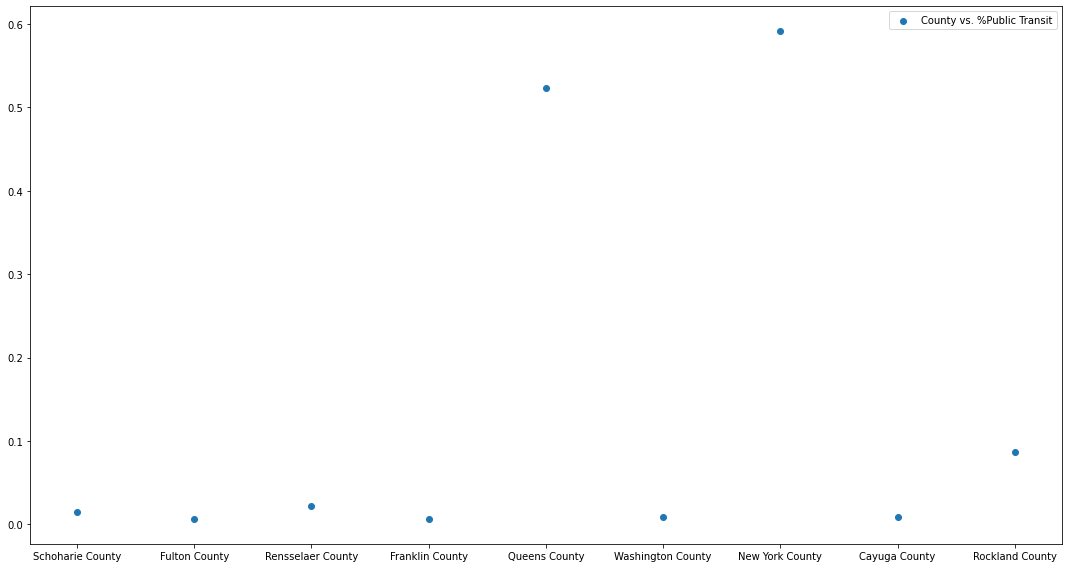

In [ ]:
# Let's plot the columns from the dataframe

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

# pick only 9 counties to display
subCensusDF = censusDF.iloc[0:9]

plt.scatter(subCensusDF['County_Name'], subCensusDF['Percent_Public_Transit'], label="County vs. %Public Transit")
plt.legend()


plt.show()



### **Decsriptive Analysis**

* Frequency Distribution
* Measures of Centrality
* Dispersion of a Distribution



### **Frequency Distribution**

Histograms plot values of observations on the horizontal axis, with a bar
showing how many times each value occurred in the dataset. Let us take a look at an example of how a histogram can be crafted out of a dataset. 

 


**Example**:

* The following dataset represents Productivity measured in terms of output for a group of data science professionals: https://raw.githubusercontent.com/bforoura/IDS/main/productivity.json 

* Some of them went through extensive statistics training (represented as “Y” in the Training column) while others did not (N). 

* The dataset also contains the work experience (denoted as Experience) of each professional in terms of number of working hours.

In [6]:
# Let's import the JSON file and ispect it

import json
from urllib.request import urlopen


# store the URL in url as parameter for urlopen
url = "https://raw.githubusercontent.com/bforoura/IDS/main/productivity.json"
  
# store the response of URL
response = urlopen(url)
  
# converting the JSON response to a dataframe
dataDF = pd.DataFrame(json.loads(response.read()))
  
# print the json response
print(dataDF)




    Productivity  Experience Training
0              5           1        Y
1              2           0        N
2             10          10        Y
3              4           5        Y
4              6           5        Y
5             12          15        Y
6              5          10        Y
7              6           2        Y
8              4           4        Y
9              3           5        N
10             9           5        Y
11             8          10        Y
12            11          15        Y
13            13          19        Y
14             4           5        N
15             5           7        N
16             7          12        Y
17             8          15        N
18            12          20        Y
19             3           5        N
20            15          20        Y
21             8          16        N
22             4           9        N
23             6          17        Y
24             9          13        Y
25          

In [7]:
# Let's inspect the size of the dataframe

dataDF.shape



(30, 3)

In [8]:
# The column data types

dataDF.dtypes



Productivity     int64
Experience       int64
Training        object
dtype: object

In [9]:
# Let's inspect the numeric columns and their values

dataDF.describe()



,Productivity,Experience
count,30.000000,30.0
mean,7.266667,10.0
std,3.453467,6.0
min,2.000000,0.0
25%,5.000000,5.0
50%,6.500000,9.5
75%,9.000000,15.0
max,15.000000,20.0


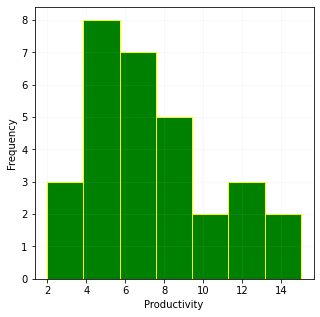

In [10]:
# Let's generate the histogram for Productivity

import matplotlib.pyplot as plt

# To construct a histogram, the first step is to “bin” the range of values — that is, divide the 
# entire range of values into a series of intervals — and then count how many values fall into each 
# interval. 
plt.figure(figsize=(5, 5))
plt.hist(dataDF['Productivity'], bins=7, color="green", edgecolor="yellow")

plt.xlabel('Productivity')
plt.ylabel('Frequency')

# alpha is the % of transparency
plt.grid(axis='y', alpha=0.1)
plt.grid(axis='x', alpha=0.1)

plt.show()



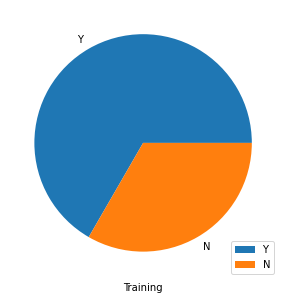

In [11]:
# Let's draw the Pie chart showing the distribution of “Training” in the Productivity data.

mylabels = ["Y", "N"]
plt.figure(figsize=(5, 5))
plt.pie(dataDF['Training'].value_counts(), labels = mylabels)

plt.xlabel('Training')
plt.legend(loc="lower right")

plt.show()




###**Normal Distribution**

In an ideal world, data would be distributed symmetrically around
the center of all scores. Thus, if we drew a vertical line through the center of a distribution, both sides should look the same. This so-called **normal distribution** is characterized by a bell-shaped curve, an example of which is shown below:

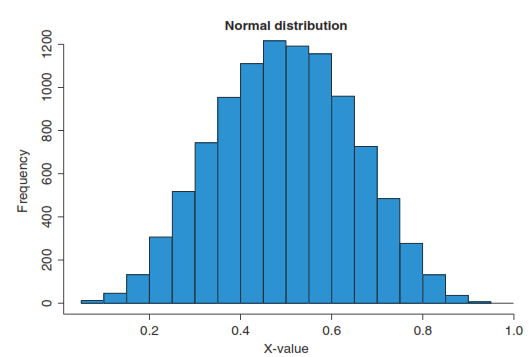





### **Deviations from Normal Distribution**

There are two ways in which a distribution can deviate from normal:

* Lack of symmetry (called **skew**)
* Pointiness (called **kurtosis**)

A skewed distribution can be either **positively** or **negatively skewed**:


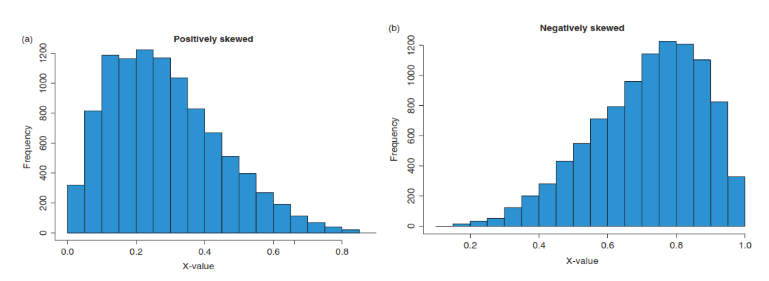



**Kurtosis**, on the other hand, refers to the degree to which scores cluster at the end of a distribution and how **pointy** a distribution is:

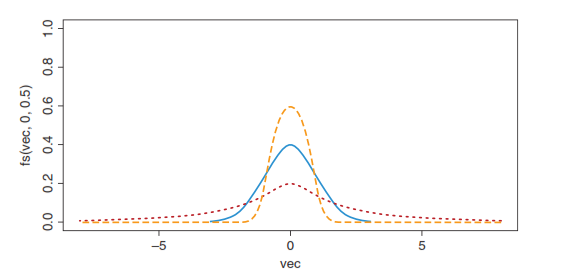


### **Measures of Centrality**

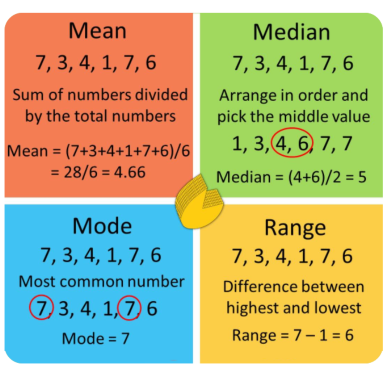


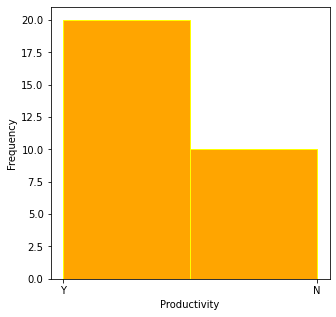

In [12]:
# As depicted below, in the Productivity dataset, there are 10 instances of N 
# and 20 instances of Y values in Training. So, in this case, the mode for 
# Training is Y. 

# Note: If the number of instances of Y and N are the same, then there would be 
# no mode for Training.


plt.figure(figsize=(5, 5))
plt.hist(dataDF['Training'], bins=2, color="orange", edgecolor="yellow")

plt.xlabel('Productivity')
plt.ylabel('Frequency')

plt.show()



### **Dispersion of a Distribution**

* Simply looking at a central point (mean, median, or mode) may not help in understanding the actual shape of a distribution. 

* Therefore, we often look at the spread, or the dispersion, of a distribution.
* A **boxplot** is common technique for examining dispersion.

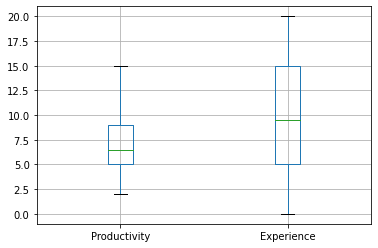

In [13]:
# As shown in the boxplot for the “Experience” attribute, after removing the top 
# one-fourth values (between 5 and 20) and bottom one-fourth (close to zero to 5), 
# the range of the remaining data can be calculated 0 (from 5 to 15). 

# Likewise, the interquartile range of the “Productivity” attribute can be 
# calculated as 5.

dataDF.boxplot()



### **Variance**

* A measure used to indicate how spread out the data points are. 

* To measure the variance, the common method is to pick a center of the distribution, typically the mean, then measure how far each data point is from the center. 

* If the individual observations vary greatly from the group mean, the variance is big; and vice versa. 

* It is important to distinguish between the variance of a **population** and the variance of a **sample**. 

* They have different notations, and they are computed differently. The variance of a population is denoted by **σ^2** and the variance of a sample by **s^2**

* Using these formulas, the variance of the sample is an unbiased estimate of the variance of the population:



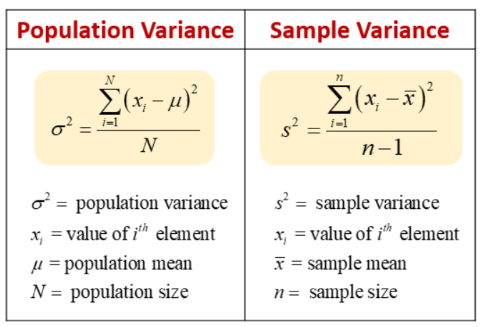





In [23]:
# using  the dataframe's bulit-in variance 

dataDF.var()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Productivity    11.926437
Experience      36.000000
dtype: float64

In [22]:
# calculating the sample variances using our own function

##########################
def variance(observations):

    mean = sum(observations) / len(observations)
    squared_differences = 0

    for number in observations:
        difference = mean - number
        squared_difference = difference ** 2
        squared_differences += squared_difference
    
    variance = squared_differences / (len(observations) - 1)
    return variance
##########################


print("Productivity: ", variance(dataDF['Productivity']))
print("Experience: ", variance(dataDF['Experience']))




Productivity:  11.926436781609196
Experience:  36.0


### **Standard Deviation**

* There is one issue with the variance as a measure. 

* It gives us the measure of spread in units squared. So, for example, if we measure the variance of age (measured in years) of all the students in a class, the measure we will get will be in years^2

* However, it would make more sense if we got the measure in years (not years squared). For this reason, we often take the square root of the variance, which ensures the measure of average spread is in the same units as the original measure:

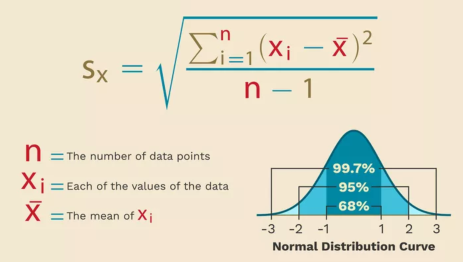



### **References**
* A Hands-On Introduction to Data Science, Chirag Shah, Cambridge University Press 
* https://towardsdatascience.com/mapping-us-census-data-with-python-607df3de4b9c

* https://thispointer.com/pretty-print-a-pandas-dataframe/#psql-format
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://www.w3resource.com/pandas/dataframe/dataframe-boxplot.php
* https://plotly.com/python/county-choropleth/
* https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html
